# Logistic Regression

We will focus on binary classification, so that we have two outputs, a positive and negative, (1 or 0). To give some examples of what we mean by binary: we could classify email as either spam or not spam, or tumors as either malignant or benign. In both these cases we have a set of data and features, but only two possible outputs. It is possible to have more than just two classes, but for now we will focus on binary classification.

In order to perform this classification we will be using the logistic function to perform logistic regression.

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

/home/hasanb/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/hasanb/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Part 1: Basic Mathematical Overview

First, let's take a look at the [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function). The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as:
$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

A graph of the logistic function looks like this (following code):

Text(0.5,1,' Logistic Function ')

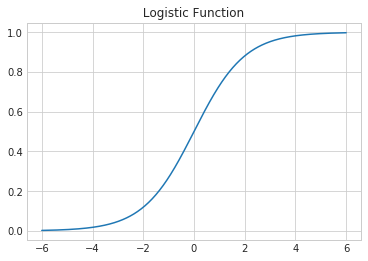

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')


If we remember back to the Linear Regression Lectures, we could describe a [Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) Function model as:
$$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$

Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form:
$$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$

For our logistic function, if we view *t* as a linear function with a variable *x* we could express t as:
$$ t = \beta _0 + \beta _1 x $$

Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as:
$$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$

Now we can interpret F(x) as the probability that the dependent variable is a "success" case, this is a similar style of thinking as in the Binomial Distribution, in which we had successes and failures. So the formula for F(x) that we have here states that the probability of the dependent variable equaling a "success" case is equal to the value of the logistic function of the linear regression expression (the linear equation we used to replace *t* ).

Inputting the linear regression expression into the logistic function allows us to have a linear regression expression value that can vary from positive to negative infinity, but after the transformation due to the logistic expression we will have an output of F(x) that ranges from 0 to 1.

We can now perform a binary classification based on where F(x) lies, either from 0 to 0.5, or 0.5 to 1. 

#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [3]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [4]:
# Preview
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Great! Let's go ahead and start our classfication by creating a new column called 'Had_Affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [5]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

Let's go ahead and see the result!

In [6]:
# DataFrame Check
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


Now let's go ahead and groupby the newly created 'Had_Affair' column. We'll do this by grouping by the column and then calling the mean aggregate function. 

In [7]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.

Let's go ahead and try to visualize some of this data.

First some histograms.

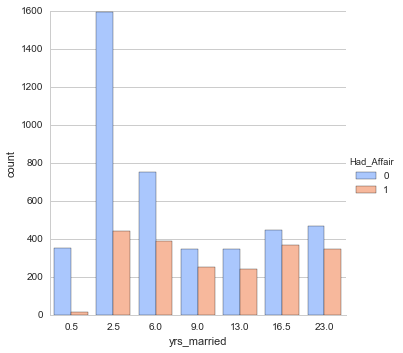

In [231]:
# Factorplot for years married with Had Affair hue
sns.factorplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm')

Looks like probability of having an affair increases with the number of years married. Let's check the number of children.

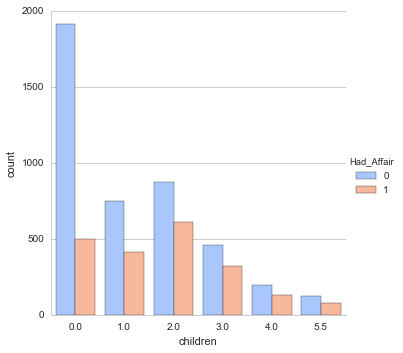

In [232]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('children',data=df,hue='Had_Affair',palette='coolwarm')

Pretty strong evidence suggesting that less children results in a lower probability of an affair. Finally let's check the education level.

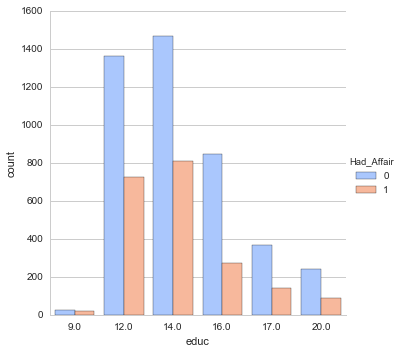

In [233]:
# Factorplot for number of children with Had Affair hue
sns.factorplot('educ',data=df,hue='Had_Affair',palette='coolwarm')

In [11]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [12]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

Now we will create the X and Y data sets for out logistic regression!

In [13]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [14]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

Now we will concatenate all the DataFrames together.

In [15]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


Now let's go ahead and set up the Y.

In [16]:
# Set Y as Target class, Had Affair
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid [multicollinearity](http://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity). Multicollinearity occurs due to the [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_(statistics)) we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [17]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y target makes sense
X = X.drop('affairs',axis=1)

# PReview
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called [ravel](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html). Let's use it!

In [18]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0])

### Part 7: Logistic Regression with SciKit Learn

Awesome! Now let's go ahead and run the logistic regression. This is a very similar process to the Linear Regression from the previous lecture. We'll create the model, the fit the data into the model, and check our accuracy score. Then we'll split the data into testing and training sets and see if our results improve.

Let's start by initiating the model!

In [19]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.7258875274897895

Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the [null error rate](http://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

In [20]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [27]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [28]:
coeff_df

,0,1
0,rate_marriage,[-0.6979241259983819]
1,age,[-0.05636462990783746]
2,yrs_married,[0.1039190416377106]
3,children,[0.018162236380201636]
4,religious,[-0.36851766233593714]
5,educ,[0.008755052615172464]
6,occ2,[0.2980522629710559]
7,occ3,[0.6079927295148537]
8,occ4,[0.34622167974052076]
9,occ5,[0.9425051118232101]


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair. 

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student).

In [22]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.7167085427135679
